In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
training = pd.read_csv('training_dataset.csv')
training.drop(["total_watts", "w_big", "w_little", "w_gpu", "w_mem"], axis=1, inplace=True)

blackscholes = pd.read_csv('testing_blackscholes.csv')
blackscholes.drop(["total_watts", "w_big", "w_little", "w_gpu", "w_mem"], axis=1, inplace=True)

bodytrack = pd.read_csv('testing_bodytrack.csv')
bodytrack.drop(["total_watts", "w_big", "w_little", "w_gpu", "w_mem"], axis=1, inplace=True)

datasets = {"blackscholes": blackscholes, "bodytrack": bodytrack}

In [3]:
# The frequency column has big numbers, need to scale it down
training["freq_big_cluster"] = training["freq_big_cluster"] / 1000000
for dataset in datasets:
    datasets[dataset]["freq_big_cluster"] = datasets[dataset]["freq_big_cluster"] / 1000000

In [4]:
# Import MLPRegressor
from sklearn.neural_network import MLPRegressor

# Create a MLPRegressor for each core 4 to 7
mlp_4 = MLPRegressor(hidden_layer_sizes = (128, 64, 32), activation = 'relu', random_state = 42)
mlp_5 = MLPRegressor(hidden_layer_sizes = (128, 64, 32), activation = 'relu', random_state = 42)
mlp_6 = MLPRegressor(hidden_layer_sizes = (128, 64, 32), activation = 'relu', random_state = 42)
mlp_7 = MLPRegressor(hidden_layer_sizes = (128, 64, 32), activation = 'relu', random_state = 42)

models = {"4": mlp_4, "5": mlp_5, "6": mlp_6, "7": mlp_7}

Training core: 4


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicting now
Dataset: blackscholes
Core: 4
MSE: 4.481239952688349



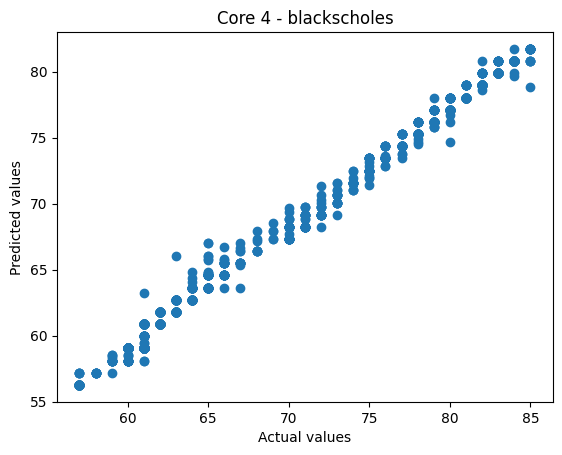

Dataset: bodytrack
Core: 4
MSE: 9.448614638178396



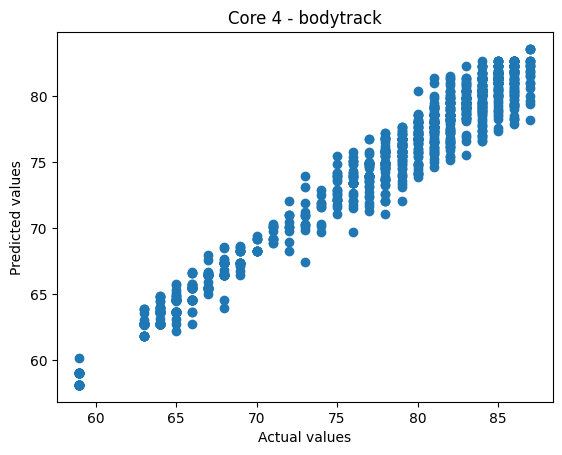

Training core: 5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicting now
Dataset: blackscholes
Core: 5
MSE: 4.0861972079977384



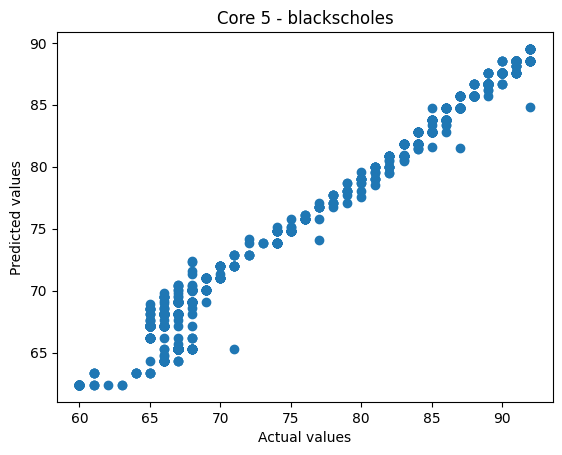

Dataset: bodytrack
Core: 5
MSE: 9.421437821826437



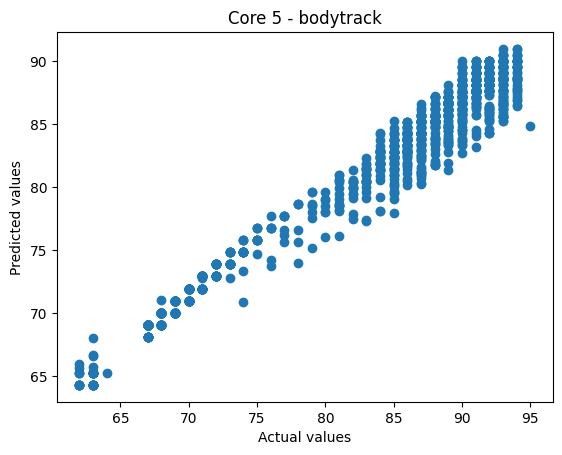

Training core: 6


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicting now
Dataset: blackscholes
Core: 6
MSE: 5.503826217553162



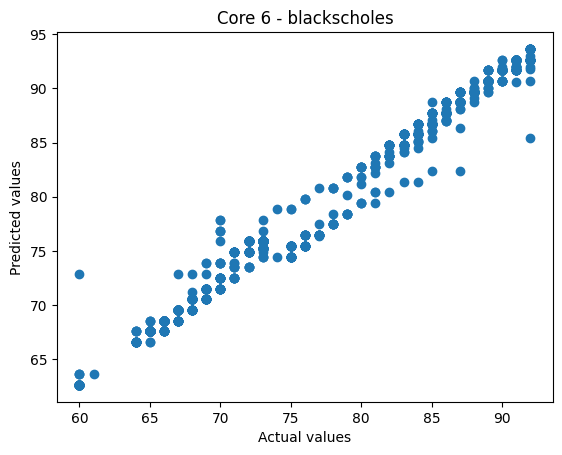

Dataset: bodytrack
Core: 6
MSE: 4.76257376813582



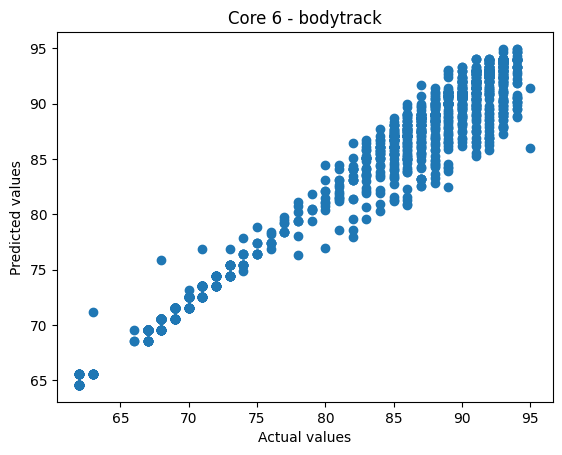

Training core: 7


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Predicting now
Dataset: blackscholes
Core: 7
MSE: 2.0996042498762515



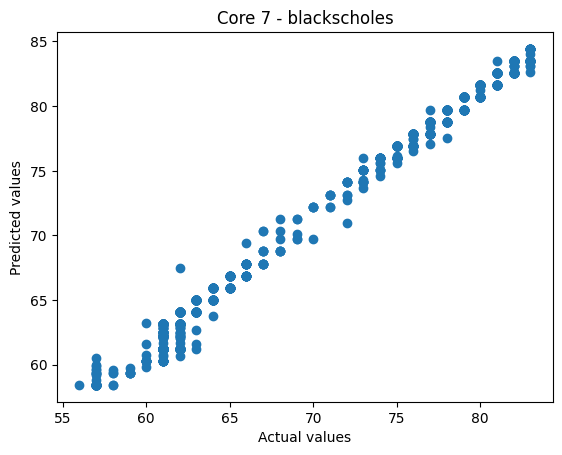

Dataset: bodytrack
Core: 7
MSE: 2.1430557299629394



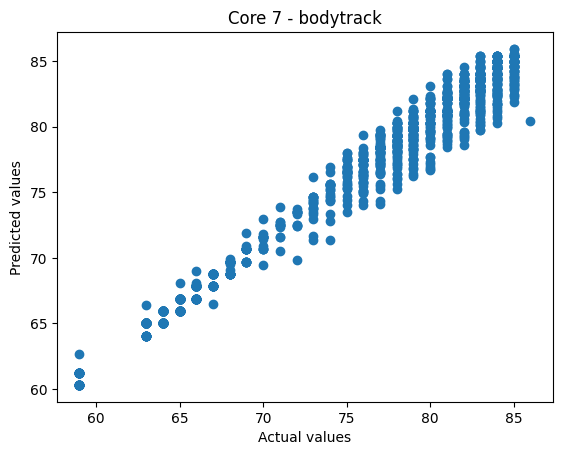

In [5]:
from sklearn.metrics import mean_squared_error

for model in models.keys():
    print("Training core: " + model)
    usage = "usage_c" + model
    temp = "temp" + model
    x_training = training[[usage, "temp_gpu", "freq_big_cluster"]]
    y_training = training[[temp]]
    models[model].fit(x_training, y_training.values)
    print("Predicting now")
    
    for dataset in datasets.keys():
        x = datasets[dataset][[usage, "temp_gpu", "freq_big_cluster"]]
        y = datasets[dataset][[temp]]
        y_pred = models[model].predict(x)

        print("Dataset: " + dataset)
        print("Core: " + model)
        print("MSE: " + str(mean_squared_error(y, y_pred)))
        print()

        # Plot the predicted values vs the actual values
        plt.scatter(y, y_pred)
        plt.xlabel("Actual values")
        plt.ylabel("Predicted values")
        plt.title("Core " + model + " - " + dataset)
        plt.show()